In [1]:
import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("us_change_cleaned.csv")
X = data.drop(columns='Consumption')
y = data['Consumption']

In [3]:
X.shape, y.shape

((198, 6), (198,))

In [4]:
def estimar_tendencia(series, d):
    n = len(series)
    q = (d - 1) / 2 if d % 2 != 0 else d / 2  # Definição de q
    q = int(q)
    n = int(n)
    tendencia = np.full(n, np.nan)  # Inicializa com NaN

    for t in range(q, n - q):
        if d % 2 != 0:  # d ímpar
            tendencia[t] = np.mean(series[t - q:t + q + 1])
        else:  # d par
            valores = series[t - q:t + q]
            tendencia[t] = (0.5 * series[t - q] + np.sum(valores) + 0.5 * series[t + q]) / d
    
    return tendencia

tendencia = estimar_tendencia(y, 4)


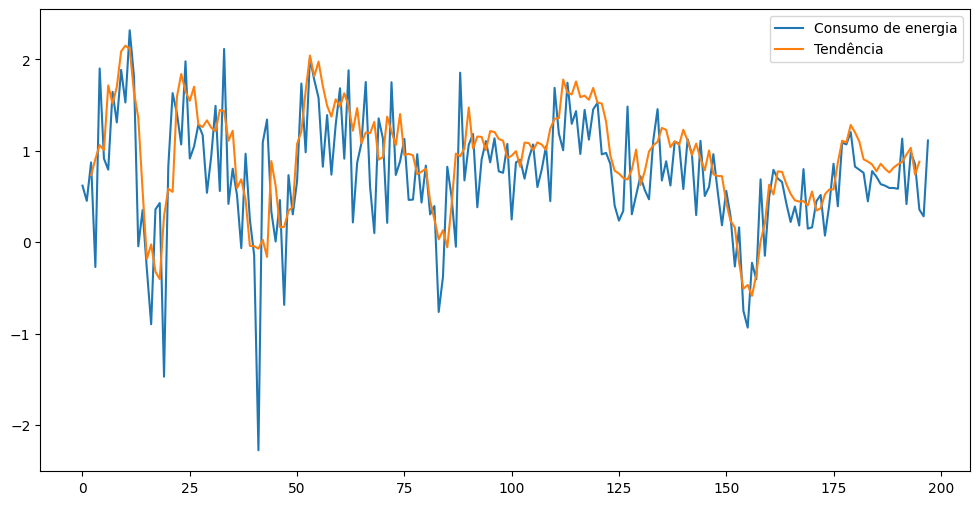

In [5]:
# Plotando a série temporal
plt.figure(figsize=(12, 6))
plt.plot(y, label='Consumo de energia')
plt.plot(tendencia, label='Tendência')
plt.legend()
plt.show()


In [6]:
def calcular_sazonalidade(series, tendencia, d):
    n = len(series)
    # Inicializa W_k para cada k = 1, ..., d
    W = [[] for _ in range(d)]
    
    # Calcula os desvios iniciais
    for t in range(n):
        if not np.isnan(tendencia[t]):  # Ignorar valores onde T_t é NaN
            k = t % d  # Índice sazonal
            W[k].append(series[t] - tendencia[t])
    
    # Calcula a média dos desvios para cada componente sazonal k
    W_k = [np.mean(W[k]) if len(W[k]) > 0 else 0 for k in range(d)]
    
    # Ajusta para garantir que a média sazonal seja zero
    ajuste = np.mean(W_k)
    S_k = [W_k[k] - ajuste for k in range(d)]
    
    # Gera S_t repetindo S_k para toda a série
    S_t = np.array([S_k[t % d] for t in range(n)])
    
    # Calcula a série dessazonalizada
    R_t = series - tendencia - S_t
    
    return S_t, R_t

S_t, R_t = calcular_sazonalidade(y, tendencia, 4)

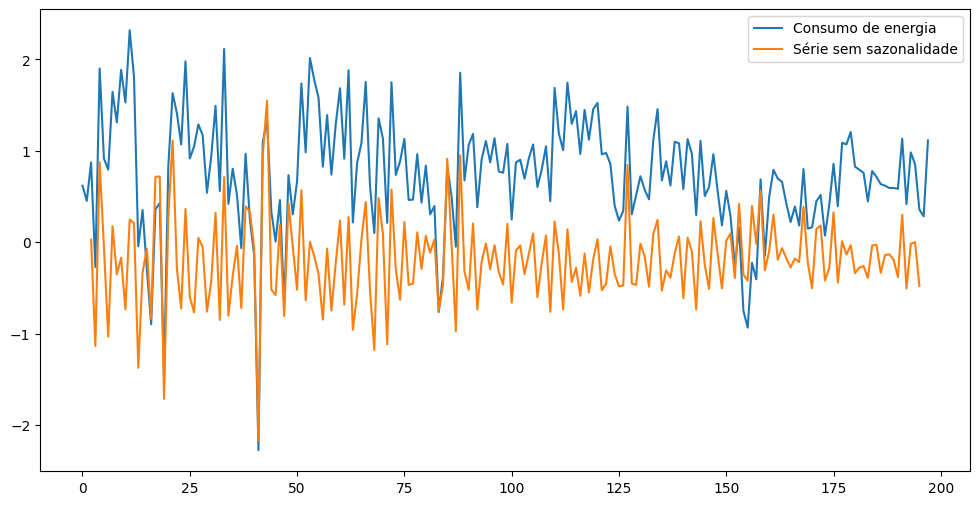

In [22]:
# Plot da série temporal sem sazonalidade
plt.figure(figsize=(12, 6))
plt.plot(y, label='Consumo de energia')
plt.plot(R_t, label='Série sem sazonalidade')
plt.legend()
plt.show()



In [8]:
X_train = X[:int(0.8*len(X))]
y_train = y[:int(0.8*len(y))]
X_test = X[int(0.8*len(X)):]
y_test = y[int(0.8*len(y)):]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((158, 6), (158,), (40, 6), (40,))

In [9]:
X_train[-4:]

,Quarter,Income,Production,Savings,Unemployment,Date
154,154,-2.123959,-3.349753,-27.365973,0.5,2008 Q3
155,155,0.867342,-4.371497,34.223733,1.2,2008 Q4
156,156,-0.429951,-5.778784,-5.022486,1.4,2009 Q1
157,157,1.069271,-2.890965,22.778077,0.8,2009 Q2


In [10]:
y_train[-4:]

154   -0.751601
155   -0.935007
156   -0.226118
157   -0.405844
Name: Consumption, dtype: float64

In [11]:
X_test[:4]

,Quarter,Income,Production,Savings,Unemployment,Date
158,158,-1.137177,1.491363,-26.369067,0.3,2009 Q3
159,159,-0.024645,1.557405,3.304550,0.1,2009 Q4
160,160,0.560634,1.947034,3.077214,0.0,2010 Q1
161,161,1.634157,1.944893,15.822528,-0.5,2010 Q2


In [12]:
metrics = ['mse', 'mae']

In [13]:
# Mean 
model = models.Mean()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.evaluate(metrics=metrics, X=X_test, y=y_test)


{'mse': 0.12819038773370228, 'mae': 0.2858484325156872}

In [14]:
print(y_train.mean())
print(y_pred)

0.7782184182306155
[0.77821842 0.77821842 0.77821842 0.77821842 0.77821842 0.77821842
 0.77821842 0.77821842 0.77821842 0.77821842 0.77821842 0.77821842
 0.77821842 0.77821842 0.77821842 0.77821842 0.77821842 0.77821842
 0.77821842 0.77821842 0.77821842 0.77821842 0.77821842 0.77821842
 0.77821842 0.77821842 0.77821842 0.77821842 0.77821842 0.77821842
 0.77821842 0.77821842 0.77821842 0.77821842 0.77821842 0.77821842
 0.77821842 0.77821842 0.77821842 0.77821842]


In [15]:
# RandomWalk
model = models.RandomWalk()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.evaluate(metrics=metrics, X=X_test, y=y_test)


{'mse': 1.1112844464118405, 'mae': 1.0071672410592745}

In [16]:
print(y_train.iloc[-1])
print(y_pred)

-0.405843686476004
[-0.40584369 -0.40584369 -0.40584369 -0.40584369 -0.40584369 -0.40584369
 -0.40584369 -0.40584369 -0.40584369 -0.40584369 -0.40584369 -0.40584369
 -0.40584369 -0.40584369 -0.40584369 -0.40584369 -0.40584369 -0.40584369
 -0.40584369 -0.40584369 -0.40584369 -0.40584369 -0.40584369 -0.40584369
 -0.40584369 -0.40584369 -0.40584369 -0.40584369 -0.40584369 -0.40584369
 -0.40584369 -0.40584369 -0.40584369 -0.40584369 -0.40584369 -0.40584369
 -0.40584369 -0.40584369 -0.40584369 -0.40584369]


In [17]:
# SeasonalRandomWalk
model = models.SeasonalRandomWalk()
model.fit(X_train, y_train,4)
y_pred = model.predict(X_test)
model.evaluate(metrics=metrics, X=X_test, y=y_test)

{'mse': 1.571022276851322, 'mae': 1.1809660421185963}

In [18]:
# Drift
model = models.Drift()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.evaluate(metrics=metrics, X=X_test, y=y_test)

{'mse': 1.420756470158393, 'mae': 1.140927793687848}

In [19]:
# ExponentialSmoothing
model = models.ExponentialSmoothing()
model.fit(X_train, y_train, 0.5)
y_pred = model.predict(X_test,20)
model.evaluate(metrics=metrics, X=X_test, y=y_test,steps=20)

{'mse': 1.3995552417377886, 'mae': 1.154282189559432}

In [20]:
# LinearRegression
model = models.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.evaluate(metrics=metrics, X=X_test, y=y_test)

{'mse': 0.02238550411797885, 'mae': 0.11513144763974555}